# 1.대중교통 데이터 내려받기
* https://www.t-money.co.kr/ 에서 제공되는 대중교통 통계자료 다운로드

# 2. 지하철 유무임별 이용현황 데이터 정제하기

In [4]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

for i in range(4,8):
    row[i] = int(row[i])
print(row)
    


['2020-11', '우이신설선', '709', '신설동', 34911, 36311, 22695, 19995]


# 3. 유임 승차 비율이 가장 높은 역은 어디일까

### 알고리즘 생각
    * 데이터를 읽어온다
    * 모든 역의 데이터를 바탕으로 각 역의 비율(rate)을 계산한다
    * 비율이 가장 높은 역을 찾는다
    * 비율이 가장 높은 역이 어디인지, 그 비율이 얼마인지 출력한다

rate = 유임승차인원 / 무임승차인원

In [3]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = 0
rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0:  # 만약 row[6] (무임 승차 인원) 값이 0이 아니라면
        rate = row[4] / row[6] # 유임승차 인원 / 무임 승차 인원
        if rate > mx : # 만약 rate 값이 mx 값보다 크다면
            mx = rate  # mx 값을 rate 값으로 업데이트하기
            print(row, round(rate,2)) # 업데이트된 값 출력하기
print(mx)

['2020-11', '1호선', '1', '서울역', 970425, 919628, 163629, 153605] 5.93
['2020-11', '1호선', '2', '시청', 470299, 476546, 61681, 59054] 7.62
['2020-11', '2호선', '11', '시청', 524632, 511719, 44104, 39821] 11.9
['2020-11', '2호선', '19', '한양대', 193058, 210112, 11357, 11982] 17.0
['2020-11', '3호선', '73', '충무로', 21, 0, 1, 0] 21.0
21.0


* 충무로 역을 보면 유임승차, 무임하차 값이 모두 0
* 이번에는 전체 인원 중 유임 승차 인원을 구하는 방법으로 데이터를 다뤄보자
* rate = 유임 승차 인원 / 전체(유임+무임) 인원

In [2]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = 0
rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4]+row[6]) > 100000 :# 만약 row[6] (무임 승차 인원) 값이 0이 아니고 전체인원이 100,000명 이상인 경우
        rate = row[4] / (row[4]+row[6])        # 유임승차 인원 / 전체 인원
        if rate > mx :                # 만약 rate 값이 mx 값보다 크다면
            mx = rate                 # mx 값을 rate 값으로 업데이트하기
            print(row, round(rate,2)) # 업데이트된 값 출력하기
print(mx)

['2020-11', '1호선', '1', '서울역', 970425, 919628, 163629, 153605] 0.86
['2020-11', '1호선', '2', '시청', 470299, 476546, 61681, 59054] 0.88
['2020-11', '2호선', '11', '시청', 524632, 511719, 44104, 39821] 0.92
['2020-11', '2호선', '19', '한양대', 193058, 210112, 11357, 11982] 0.94
['2020-11', '경부선', '121', '서울역', 145486, 37641, 8385, 1930] 0.95
['2020-11', '공항철도 1호선', '644', '마곡나루(서울식물원)', 173255, 166982, 9365, 9389] 0.95
0.9487186507501917


### * 유임 승차 비율이 가장 높은 역 찾기

In [5]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

mx = 0
rate = 0
mx_station = ''

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] != 0 and (row[4]+row[6]) > 100000 :# 만약 row[6] (무임 승차 인원) 값이 0이 아니고 전체인원이 100,000명 이상인 경우
        rate = row[4] / (row[4]+row[6])        # 유임승차 인원 / 전체 인원
        if rate > mx :                # 만약 rate 값이 mx 값보다 크다면
            mx = rate                 # mx 값을 rate 값으로 업데이트하기
            mx_station = row[3] + ' '+ row[1]
            
print(mx_station, round(mx*100,2))

마곡나루(서울식물원) 공항철도 1호선 94.87


# 4. 유무임 승하차 인원이 가장 많은 역은 어디일까

#### 알고리즘 생각하기
* 데이터를 읽어온다
* 모든 역의 데이터를 바탕으로 유임 승차, 유임 하차, 무임 승차, 무임 하차 인원이 가장 많은 역을 찾는다.
* 각각의 인원이 가장 많은 역을 출력한다

In [6]:
import csv
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)

# 인원수와 역에 대한 정보를 저장할 공간
mx = [0] * 4
mx_station = [''] * 4

# 레이블 추가
label = ['유임승차', '유임하차', '무임승차','무임하차']

for row in data:   # 모든 역에 대해서 반복
    for i in range(4,8):
        row[i] = int(row[i])  # 데이터를 정수로 바꾸기
        
        # 이때 해당 역이 지금까지 저장된 최댓값보다 클 경우 mx와 mx_station 값을 갱신
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4) : 
    print(label[i] + ' : '+mx_station[i], mx[i])

유임승차 : 강남 2호선 2019373
유임하차 : 강남 2호선 2046712
무임승차 : 종로3가 1호선 253486
무임하차 : 제기동 1호선 257699


# 5. 모든 역의 유무임 승하차 비율은 어떻게 될까
* 파이차트로 분포 비교해보기

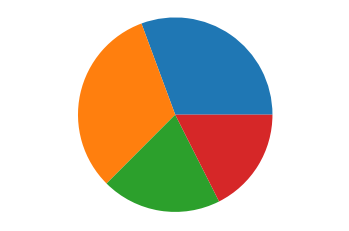

In [10]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차','무임하차']
for row in data :
    for i in range(4,8):
        row[i] = int(row[i])
plt.pie(row[4:8])
plt.axis('equal')
plt.show()

파이 차트 보완 방법 생각
* 어떤 역에 대한 차트인지 정보가 부족
* 비율을 수치로 정확하게 나타내면 좋겠음
* 색상을 좀 더 예쁘게 바꾸고 싶다

In [2]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차','무임하차']

c = ['#14CCC0','#389993','#FF1C6A','#CC14AF'] # 파이차트 색상 설정
plt.rc('font', family = 'Malgun Gothic') # 기본 글씨체 설정

for row in data :
    for i in range(4,8):
        row[i] = int(row[i])
    plt.figure(dpi = 100)
    plt.title(row[3]+' '+ row[1])
    plt.pie(row[4:8], labels=label, colors=c, autopct = '%1.f%%')
    plt.axis('equal')
    plt.savefig(row[3]+' '+row[1]+'.png')    # 이미지 파일로 저장. 마지막에 .png처럼 파일확장자형식 지정 가능
    plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

KeyboardInterrupt: 